# <span style="color: #ffcc00;">**Random Forest Regressor is Working Amazingly**</span>

## Highlights of the Notebook:

1. **Data Preprocessing and Visualization**:
    - The dataset `logical_monthly_salary_dataset.csv` is loaded and explored.
    - Various visualizations are created to understand the data, including **histograms**, **box plots**, **scatter plots**, and **heatmaps**.

2. **Label Encoding**:
    - The *'city'* feature is label encoded to convert categorical data into numerical format.

3. **Feature Selection and Splitting**:
    - The dataset is split into **features** (`X`) and **target** (`y`).
    - Data is split into **training** and **testing sets** using an 80-20 ratio.

4. **Model Building**:
    - Several models are built and evaluated including **Linear Regression**, **Gradient Boosting Regressor**, **Neural Network (MLP Regressor)**, and **Polynomial Regression**.
    - Metrics like **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R2)** are calculated for each model.

5. **Random Forest Regressor**:
    - Random Forest Regressor is to be optimized using `RandomizedSearchCV`.
    - The best model is selected and evaluated, showing **excellent performance** in terms of prediction accuracy.

## <span style="color: #ffcc00;">**Key Takeaways**</span>:

- **Random Forest Regressor** has shown superior performance compared to other models in predicting the goal savings.

The **Random Forest Regressor's** effectiveness is highlighted by its robust performance metrics, making it a **reliable choice** for this regression task.


In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("logical_monthly_salary_dataset.csv")

In [3]:
df

,years_to_retire,salary,investment_amount_per_month,current_savings,monthly_expenses,debt,number_of_dependents,city,goal_savings
0,29,197800,46300.0,1791358,122400.0,242872,0,Chennai,17100000.0
1,15,154400,17300.0,1775650,105900.0,174277,0,Pune,4734000.0
2,8,160700,20900.0,301813,92000.0,234299,3,Chennai,2208000.0
3,21,20400,3300.0,549995,11700.0,16479,4,Chennai,1340000.0
4,19,97900,23600.0,1976348,56200.0,332420,0,Jaipur,7089000.0
...,...,...,...,...,...,...,...,...,...
49995,12,28100,7600.0,1937849,17000.0,261895,1,Bangalore,2978000.0
49996,18,96200,27300.0,1920120,51800.0,360454,1,Kolkata,7523000.0
49997,34,31700,7700.0,1478063,20300.0,141589,0,Jaipur,4463000.0
49998,3,101900,28200.0,655755,63000.0,94156,4,Ahmedabad,1620000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_to_retire              50000 non-null  int64  
 1   salary                       50000 non-null  int64  
 2   investment_amount_per_month  50000 non-null  float64
 3   current_savings              50000 non-null  int64  
 4   monthly_expenses             50000 non-null  float64
 5   debt                         50000 non-null  int64  
 6   number_of_dependents         50000 non-null  int64  
 7   city                         50000 non-null  object 
 8   goal_savings                 50000 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 3.4+ MB


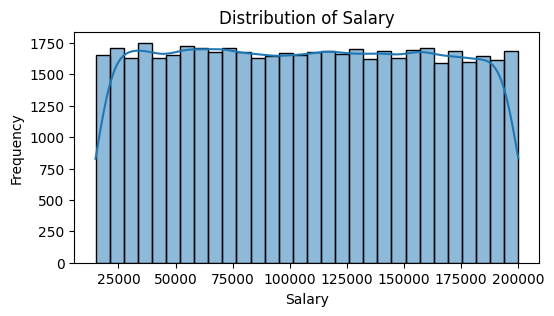

In [5]:
# Histogram for Salary
plt.figure(figsize=(6, 3))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

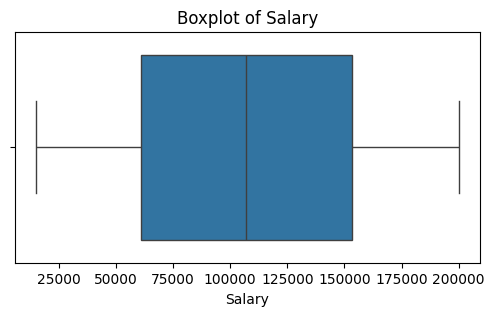

In [6]:
# Boxplot for Salary
plt.figure(figsize=(6, 3))
sns.boxplot(x='salary', data=df)
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

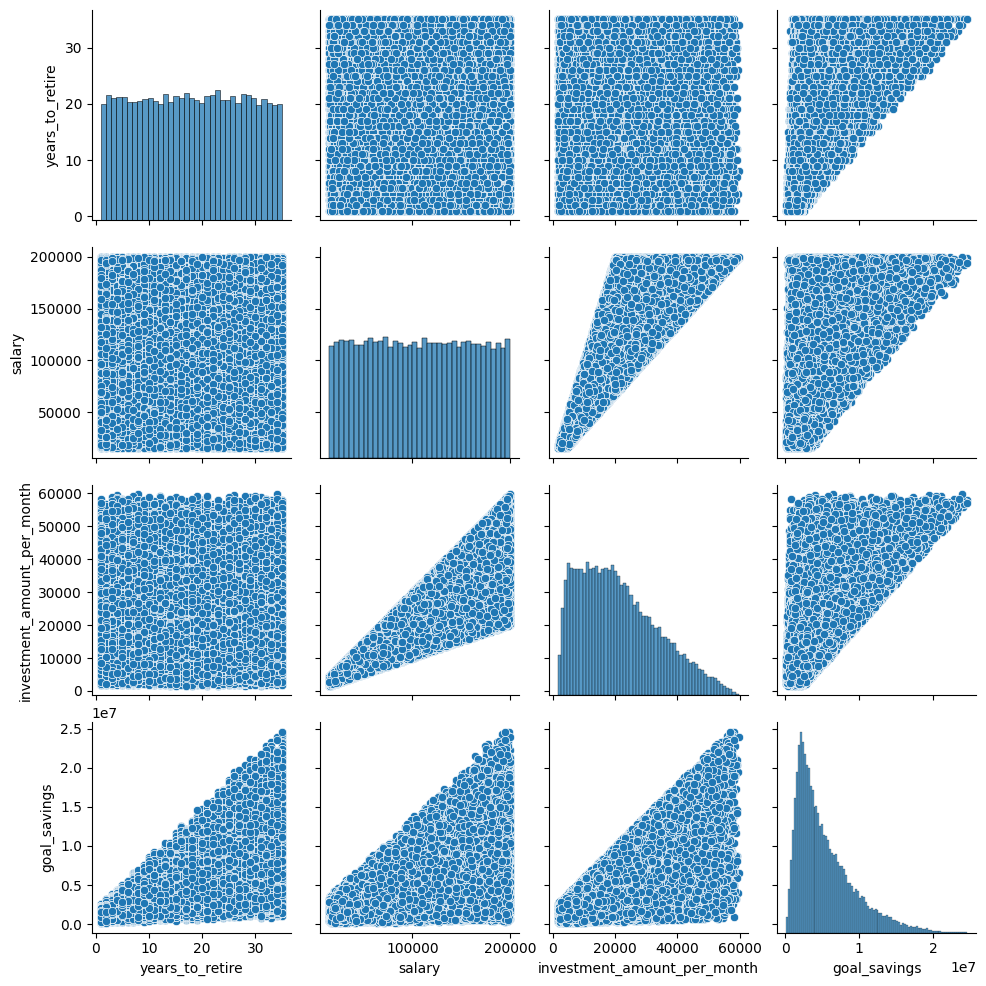

In [7]:
# Pairplot for selected features
sns.pairplot(df[['years_to_retire', 'salary', 'investment_amount_per_month', 'goal_savings']])
plt.show()

In [5]:
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

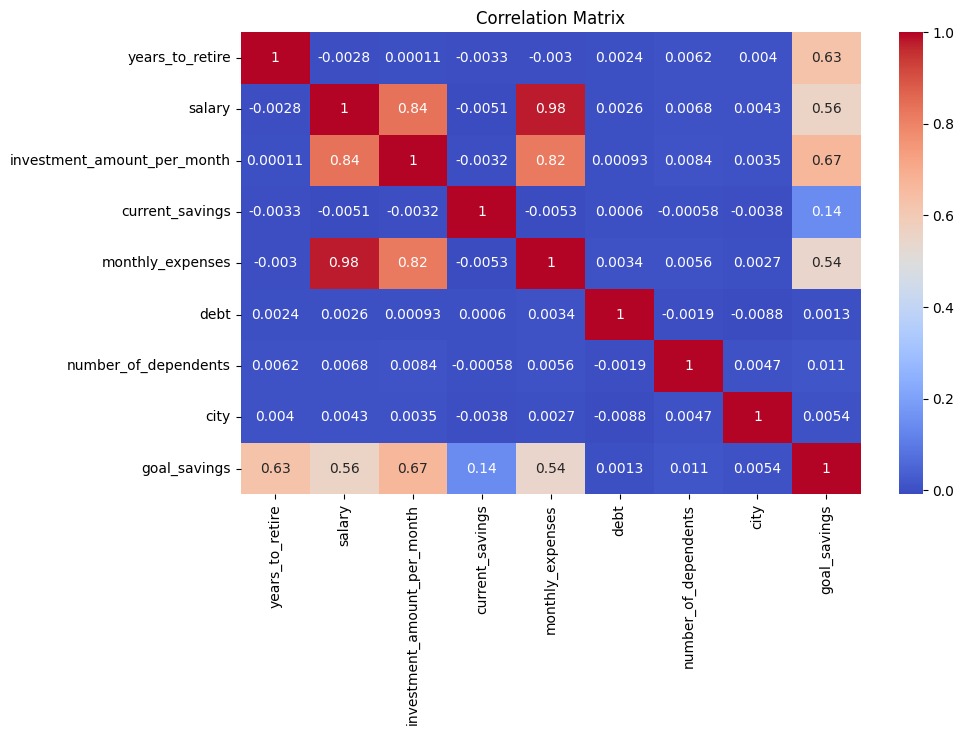

In [12]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

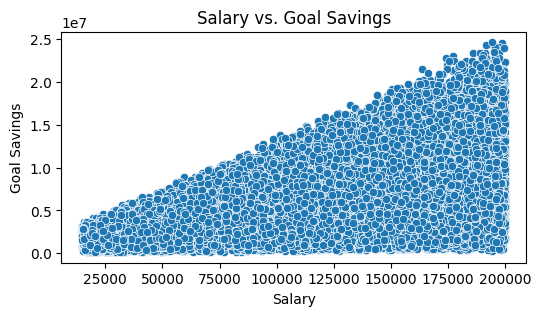

In [13]:
# Scatter plot for Salary vs. Goal Savings
plt.figure(figsize=(6, 3))
sns.scatterplot(x='salary', y='goal_savings', data=df)
plt.title('Salary vs. Goal Savings')
plt.xlabel('Salary')
plt.ylabel('Goal Savings')
plt.show()


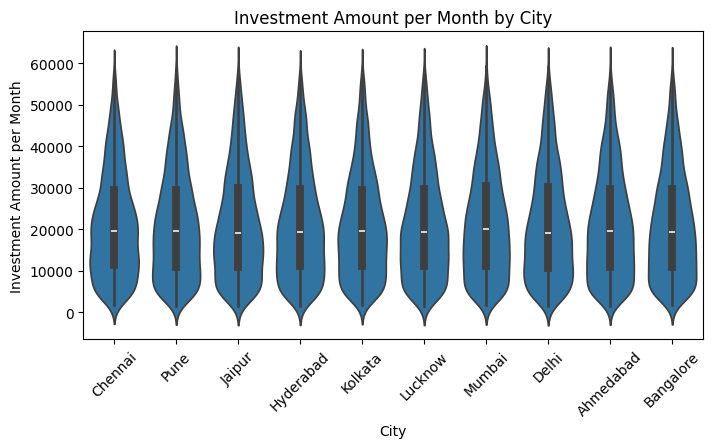

In [8]:
# Violin plot for Investment Amount per Month by City
plt.figure(figsize=(8,4))
sns.violinplot(x='city', y='investment_amount_per_month', data=df)
plt.title('Investment Amount per Month by City')
plt.xlabel('City')
plt.ylabel('Investment Amount per Month')
plt.xticks(rotation=45)
plt.show()


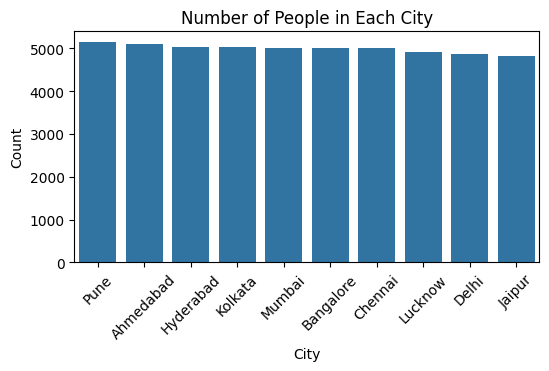

In [9]:
# Bar plot for number of people in each city
plt.figure(figsize=(6, 3))
city_counts = df['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Number of People in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

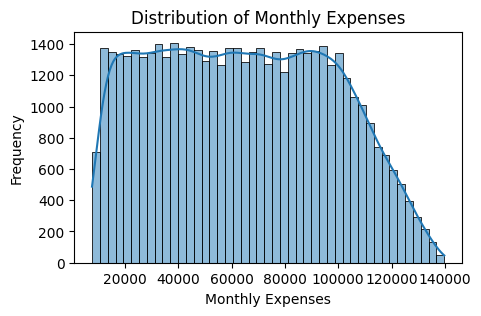

In [14]:
# Distribution plot for Monthly Expenses
plt.figure(figsize=(5, 3))
sns.histplot(df['monthly_expenses'], kde=True)
plt.title('Distribution of Monthly Expenses')
plt.xlabel('Monthly Expenses')
plt.ylabel('Frequency')
plt.show()


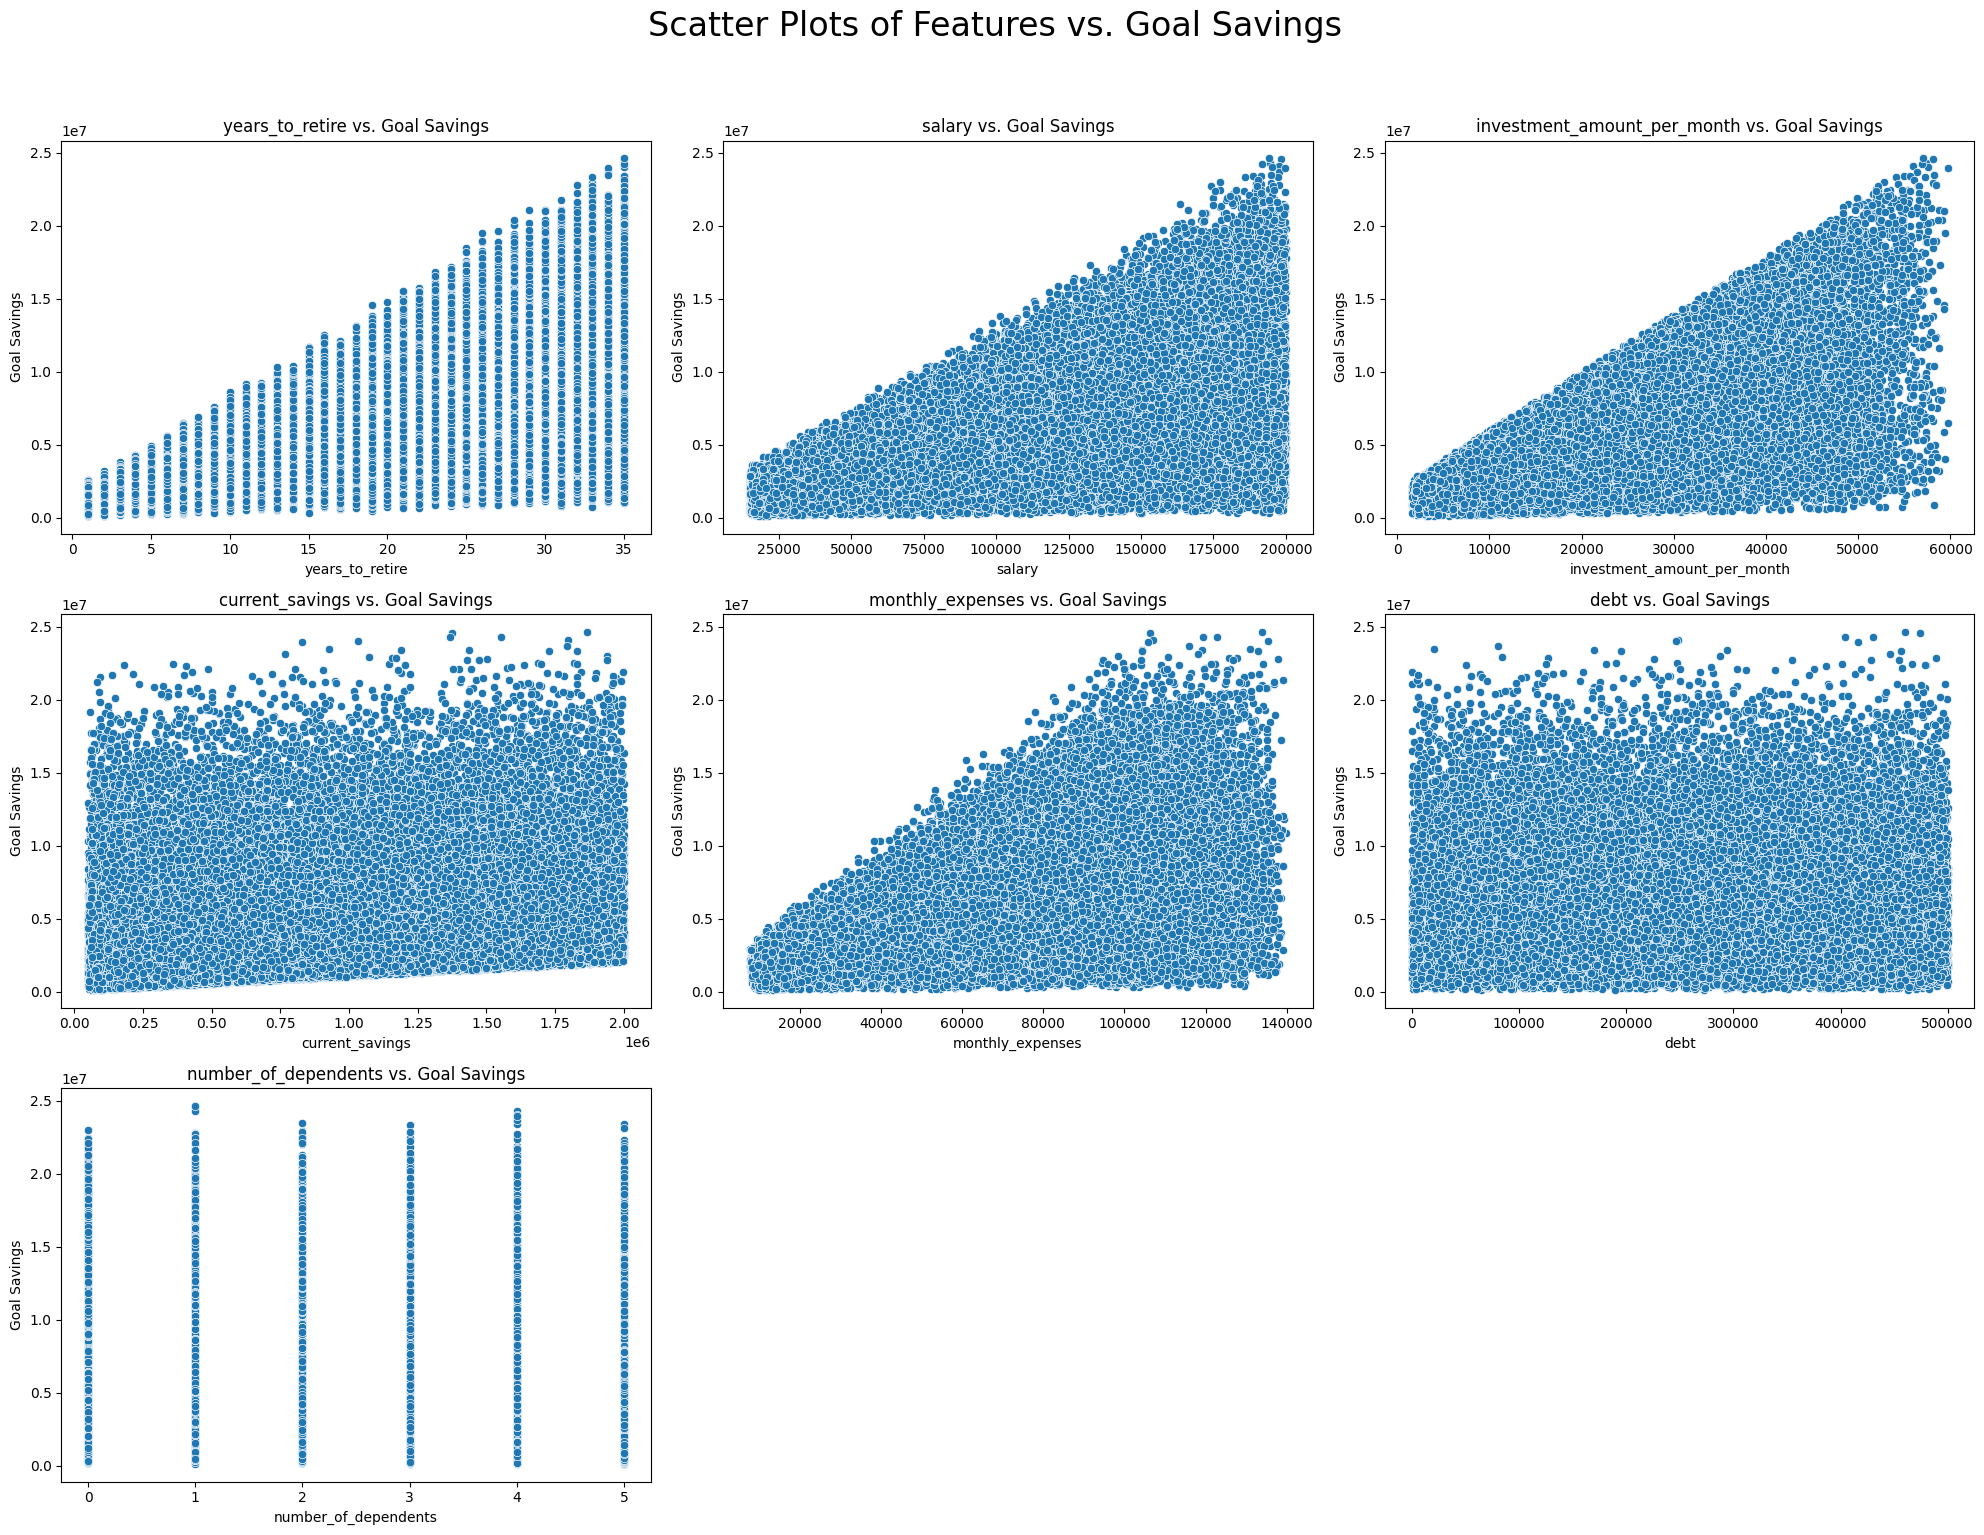

In [15]:
# Generate scatter plots for each feature with goal_savings, except for the 'city' feature
features = ['years_to_retire', 'salary', 'investment_amount_per_month', 'current_savings', 'monthly_expenses', 'debt', 'number_of_dependents']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=feature, y='goal_savings', data=df)
    plt.title(f'{feature} vs. Goal Savings')
    plt.xlabel(feature)
    plt.ylabel('Goal Savings')

plt.suptitle('Scatter Plots of Features vs. Goal Savings', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()



### From the analysis we could make it out that the fields which are in linear relation with goal_savings are as follows:

- monthly_expenses
- investment_amount_per_month
- salary
- years_to_retire 


In [10]:
df['city'].unique()

array(['Chennai', 'Pune', 'Jaipur', 'Hyderabad', 'Kolkata', 'Lucknow',
       'Mumbai', 'Delhi', 'Ahmedabad', 'Bangalore'], dtype=object)

In [6]:
df['city'].unique()

array([2, 9, 5, 4, 6, 7, 8, 3, 0, 1])

### The label encoder maps the following indices to cities:
- 0: Ahmedabad
- 1: Bangalore
- 2: Chennai
- 3: Delhi
- 4: Hyderabad
- 5: Jaipur
- 6: Kolkata
- 7: Lucknow
- 8: Mumbai
- 9: Pune

In [7]:
y = df.pop('goal_savings')
x = df.values

In [8]:
print(f"x shape: {x.shape}\ny shape: {y.shape}")

x shape: (50000, 8)
y shape: (50000,)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

# Linear Regression

In [51]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(x_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR2: {r2}")

MSE: 2033126401396.8848
RMSE: 1425877.4145756306
MAE: 1026329.0660178812
R2: 0.8643199154900283


# Ridge Regression

In [54]:
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_reg = GridSearchCV(ridge, parameters, cv=5)
ridge_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]})

In [55]:
y_pred_ridge = ridge_reg.predict(x_test)

In [56]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MSE: {mse_ridge}\nRMSE: {rmse_ridge}\nMAE: {mae_ridge}\nR2: {r2_ridge}")

MSE: 2033120432193.6377
RMSE: 1425875.32140564
MAE: 1026272.6874293815
R2: 0.8643203138430281


# <p style="color: #FFE633"><strong>Random Forest Regressor</strong></p>
## <em style="color: #08A9E5">Best one as of now</em>

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [11]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
rf_regressor = RandomForestRegressor(n_estimators=160, random_state=42)
rf_regressor.fit(x_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=160, random_state=42)

In [13]:
y_pred_rf = rf_regressor.predict(x_test_rf)

In [14]:
y_train_pred_rf = rf_regressor.predict(x_train_rf)

In [15]:
mse_rf_train = mean_squared_error(y_train_rf, y_train_pred_rf)
r2_rf_train = r2_score(y_train_rf, y_train_pred_rf)

print(f"MSE: {mse_rf_train}\nR2: {r2_rf_train}")

MSE: 1047940737.2148438
R2: 0.9999308790711666


In [16]:
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

print(f"MSE: {mse_rf}\nRMSE: {rmse_rf}\nMAE: {mae_rf}\nR2: {r2_rf}")

# MSE: 7563544330.819444
# RMSE: 86968.63992738671
# MAE: 55217.578333333324
# R2: 0.9995030998292173

MSE: 7411133980.035156
RMSE: 86087.94329077189
MAE: 54502.568125
R2: 0.999513112691709


### Overfitting Check

In [17]:
cv_scores = cross_val_score(rf_regressor, X_scaled, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.99949499 0.99953923 0.99950754 0.99950484 0.99951585]
Mean Cross-Validation R² Score: 0.999512490675364


cross-validation error
MSE vs R2 plot
regularisation
data

In [18]:
df

,years_to_retire,salary,investment_amount_per_month,current_savings,monthly_expenses,debt,number_of_dependents,city
0,29,197800,46300.0,1791358,122400.0,242872,0,2
1,15,154400,17300.0,1775650,105900.0,174277,0,9
2,8,160700,20900.0,301813,92000.0,234299,3,2
3,21,20400,3300.0,549995,11700.0,16479,4,2
4,19,97900,23600.0,1976348,56200.0,332420,0,5
...,...,...,...,...,...,...,...,...
49995,12,28100,7600.0,1937849,17000.0,261895,1,1
49996,18,96200,27300.0,1920120,51800.0,360454,1,6
49997,34,31700,7700.0,1478063,20300.0,141589,0,5
49998,3,101900,28200.0,655755,63000.0,94156,4,0


In [19]:
input= np.array([[15, 75000, 8000, 150000, 25000, 50000, 1, 3]])

scaled_input = scaler.transform(input)

goal = rf_regressor.predict(scaled_input)
print(f"Expected value: 1857043\nActual:{goal}")

Expected value: 1857043
Actual:[1537656.25]


# XGBoost

In [20]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(x_train_rf, y_train_rf)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
y_train_pred_xgb = xgb_model.predict(x_train_rf)
y_test_pred_xgb = xgb_model.predict(x_test_rf)

In [22]:
mse_train_xgb = mean_squared_error(y_train_rf, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train_rf, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test_rf, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test_rf, y_test_pred_xgb)

print(f"XGBoost Training MSE: {mse_train_xgb}")
print(f"XGBoost Training R²: {r2_train_xgb}")
print(f"XGBoost Testing MSE: {mse_test_xgb}")
print(f"XGBoost Testing R²: {r2_test_xgb}")

XGBoost Training MSE: 6444858287.873057
XGBoost Training R²: 0.999574904786848
XGBoost Testing MSE: 8301980624.256725
XGBoost Testing R²: 0.9994545869754186


## <em>Bayesian Optimizer</em>

In [25]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

Start running from here to optimize the Random Forest

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(x_train_rf, y_train_rf)

In [ ]:
# Get the best model
best_rf_random = random_search.best_estimator_

In [ ]:
# Evaluate the best model
y_train_pred_rf_random = best_rf_random.predict(x_train_rf)
y_test_pred_rf_random = best_rf_random.predict(x_test_rf)

In [ ]:
# Calculate metrics
mse_rf_train = mean_squared_error(y_train_rf, y_train_pred_rf_random)
r2_rf_train = r2_score(y_train_rf, y_train_pred_rf_random)
mse_rf_test = mean_squared_error(y_test_rf, y_test_pred_rf_random)
r2_rf_test = r2_score(y_test_rf, y_test_pred_rf_random)

# Gradient Boosting Regresor

In [31]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [32]:
y_pred_gb = gb_regressor.predict(x_test)

In [33]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"MSE: {mse_gb}\nRMSE: {rmse_gb}\nMAE: {mae_gb}\nR2: {r2_gb}")

MSE: 26014317122.75075
RMSE: 161289.5443689725
MAE: 121073.9813376435
R2: 0.9982909442907054


# Neural Network (MLP Regressor)

In [37]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
nn_regressor.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [38]:
y_pred_nn = nn_regressor.predict(x_test)

In [39]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f"MSE: {mse_nn}\nRMSE: {rmse_nn}\nMAE: {mae_nn}\nR2: {r2_nn}")

MSE: 3091397063711.0283
RMSE: 1758236.9191070434
MAE: 1213830.103742767
R2: 0.7969053050094695


# Polynomial Regression

In [40]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [41]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [42]:
poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly, y_train)

LinearRegression()

In [43]:
y_pred_poly = poly_regressor.predict(x_test_poly)

In [44]:
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)

print(f"MSE: {mse_poly}\nRMSE: {rmse_poly}\nMAE: {mae_poly}\nR2: {r2_poly}")

MSE: 83338.70795169158
RMSE: 288.68444355678673
MAE: 249.67194359726165
R2: 0.999999994524919
